<a href="https://colab.research.google.com/github/hbskay3110/bt/blob/main/Lab_7_20130298_NguyenTrungKien.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab deals with **cross validation** for some classification algorithms and **clustering methods**. 

*   **Deadline: 23:59, 10/4/2023**



# Import libraries

In [31]:
# code
from google.colab import drive

drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/DATA_ML'

Mounted at /content/gdrive
/content/gdrive/MyDrive/DATA_ML


In [38]:
# code
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.naive_bayes import GaussianNB,ComplementNB
from sklearn import datasets
from sklearn import metrics
import numpy as np
import scipy.cluster.hierarchy as shc
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.cluster import KMeans,AgglomerativeClustering
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn import metrics
from prettytable import PrettyTable
from scipy.stats import mode

In [7]:
def scoreMetrix(clf, x, y, scores=None):
  metrix = ['accuracy', 'precision_macro', 'recall_macro', 'f1_macro']
  for s in metrix:
    print(s.upper() + ':')
    score = cross_validate(clf, x, y, scoring=s, cv=10 )
    for key in score.keys():
      if scores is not None and key == 'test_score':
        scores.append(np.mean(score[key]))
      print(key + ':', np.mean(score[key]))
    print('----------')
  return scores;

#Task 1. With **iris** dataset
*  1.1. Apply **SVM** algorithm with cross validation


In [ ]:
#code
iris = datasets.load_iris(as_frame=True);
X = iris.data
y = iris.target
clf =  svm.SVC(kernel='sigmoid', random_state=0)
scores = cross_validate(clf,X,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))


['fit_time', 'score_time', 'test_score']
0.06666666666666668


*  1.2 Apply **feature selection** to the dataset and then use **RandomForest** algorithm with cross validation 

In [ ]:
#code
#using feature
clf = RandomForestClassifier()
clf.fit(iris['data'], iris['target'])
feature_sr = pd.Series(clf.feature_importances_,index=iris.feature_names).sort_values(ascending=False)
feature_imp = feature_sr.head(30)
feature_imp.index.values
x_new = iris['data'][feature_imp.index.values]
clf =  RandomForestClassifier()
scores = cross_validate(clf,x_new,y,scoring='accuracy',cv=10)
print(sorted(scores.keys()))
print(np.mean(scores['test_score']))

['fit_time', 'score_time', 'test_score']
0.9533333333333334


#Task 2. With mnist dataset: 
*   2.1. Apply **K-Means** algorithm using k=10, 

In [3]:
mnist = datasets.load_digits(as_frame=True)
X = mnist.data
y = mnist.target

In [22]:
# code
kmean = KMeans(n_clusters = 10, random_state = 0)
kmean.fit(mnist.data)
clusters = kmean.predict(mnist.data)
kmean.cluster_centers_.shape
clusters

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([5, 7, 7, ..., 7, 3, 3], dtype=int32)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

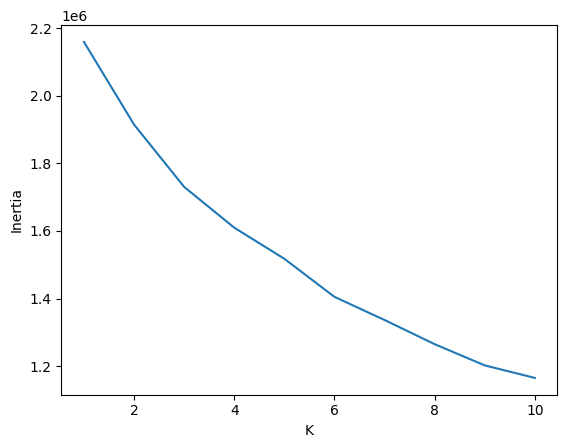

In [23]:
sse = []
k_range = range(1, 11)
for k in k_range:
 kmeans = KMeans(n_clusters=k, random_state = 0)
 kmeans.fit(mnist.data)
 sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

In [27]:
labels = np.zeros_like(clusters)
for i in range(10):
 mask = (clusters == i)
 print(mask)
 labels[mask] = mode(mnist.target[mask])[0]
 print(labels[mask])
acc = metrics.accuracy_score(mnist.target, labels)
ps = metrics.precision_score(mnist.target, labels, average='macro')
rs = metrics.recall_score(mnist.target, labels, average='macro')
fs = metrics.f1_score(mnist.target, labels, average='macro')
KMEAN = ('Kmean', round(acc, 2), round(ps, 2),round(rs, 2),round(fs, 2))

[False False False ... False False False]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4]
[False False False ... False False False]
[3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
[False False False ... False False False]
[5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5

<ipython-input-27-d9aa9dcab121>:5: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  labels[mask] = mode(mnist.target[mask])[0]


*   2.2. Compare the obtained result with with other classification algorithms such as **Randomforest**, **kNN**, and **Naïve Bayes** in terms of accuracy, precision, recall, f1 using cross validation. 


In [8]:
# code
clf =  RandomForestClassifier()
rdfores = scoreMetrix(clf, X, y, scores=['Random Forest'])



ACCURACY:
fit_time: 0.45080568790435793
score_time: 0.018105149269104004
test_score: 0.9532588454376164
----------
PRECISION_MACRO:
fit_time: 0.6312768697738648
score_time: 0.0281505823135376
test_score: 0.9536535695014965
----------
RECALL_MACRO:
fit_time: 0.4385484457015991
score_time: 0.01780071258544922
test_score: 0.9465892672858617
----------
F1_MACRO:
fit_time: 0.5201649188995361
score_time: 0.023438143730163574
test_score: 0.9469616645051081
----------


ACCURACY:
fit_time: 0.004383087158203125
score_time: 0.013993787765502929
test_score: 0.9749627560521414
----------
PRECISION_MACRO:
fit_time: 0.005654621124267578
score_time: 0.020915699005126954
test_score: 0.9774357213220217
----------
RECALL_MACRO:
fit_time: 0.007153701782226562
score_time: 0.09219746589660645
test_score: 0.9750085999312006
----------
F1_MACRO:
fit_time: 0.0052849769592285155
score_time: 0.033170008659362794
test_score: 0.9749172331935332
----------
ACCURACY:
fit_time: 0.006775546073913574
score_time: 0.0547558069229126
test_score: 0.9766325263811299
----------
PRECISION_MACRO:
fit_time: 0.004821276664733887
score_time: 0.013939499855041504
test_score: 0.9788610398545382
----------
RECALL_MACRO:
fit_time: 0.004143977165222168
score_time: 0.01509861946105957
test_score: 0.9766821465428277
----------
F1_MACRO:
fit_time: 0.004518938064575195
score_time: 0.013923978805541993
test_score: 0.9768109540040122
----------
ACCURACY:
fit_time: 0.0046924114227294925
score_time:

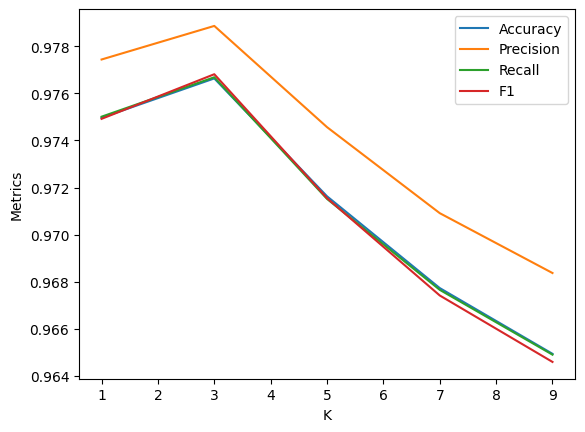

In [16]:
k = range(1,10,2);
accsKnn = [];
precssKnn = [];
recallsKnn = [];
f1sKnn = [];
Knn=[];
for i in k:
  knn = KNeighborsClassifier(n_neighbors=i)
  score = scoreMetrix(knn, X,y, scores=['KNN'])
  Knn.append(score)
  accsKnn.append(score[1])
  precssKnn.append(score[2])
  recallsKnn.append(score[3])
  f1sKnn.append(score[4])
plt.plot(k, accsKnn, label='Accuracy')
plt.plot(k, precssKnn, label='Precision')
plt.plot(k, recallsKnn, label='Recall')
plt.plot(k, f1sKnn, label='F1')
plt.xlabel('K')
plt.ylabel('Metrics')
plt.legend()
plt.show()


In [13]:
clf = GaussianNB()
nb = scoreMetrix(clf, X, y, scores=['Naive Bayes'])
print(nb)


ACCURACY:
fit_time: 0.0061457157135009766
score_time: 0.003889155387878418
test_score: 0.8113904407200497
----------
PRECISION_MACRO:
fit_time: 0.005533981323242188
score_time: 0.004164314270019532
test_score: 0.8480837289405493
----------
RECALL_MACRO:
fit_time: 0.00532689094543457
score_time: 0.004469752311706543
test_score: 0.8114189886480908
----------
F1_MACRO:
fit_time: 0.006118416786193848
score_time: 0.004582452774047852
test_score: 0.8090382615408214
----------
['Naive Bayes', 0.8113904407200497, 0.8480837289405493, 0.8114189886480908, 0.8090382615408214]


In [14]:
Knn[1]

['KNN',
 0.9471198013656114,
 0.954001401118661,
 0.9515084279325766,
 0.9470388847880707]

In [29]:
t = PrettyTable(['Classfication', 'Accuracy', 'Precision', 'Recall', 'F1'])
t.add_row(KMEAN)
t.add_row(rdfores)
t.add_row(Knn[1])
t.add_row(nb)
print(t)

+---------------+--------------------+--------------------+--------------------+--------------------+
| Classfication |      Accuracy      |     Precision      |       Recall       |         F1         |
+---------------+--------------------+--------------------+--------------------+--------------------+
|     Kmean     |        0.79        |        0.8         |        0.79        |        0.79        |
| Random Forest | 0.9532588454376164 | 0.9536535695014965 | 0.9465892672858617 | 0.9469616645051081 |
|      KNN      | 0.9766325263811299 | 0.9788610398545382 | 0.9766821465428277 | 0.9768109540040122 |
|  Naive Bayes  | 0.8113904407200497 | 0.8480837289405493 | 0.8114189886480908 | 0.8090382615408214 |
+---------------+--------------------+--------------------+--------------------+--------------------+


*   2.3. From the obtained results, **which approach is better** for this problem: Supervised learning or Unsupervised learning?

In [30]:
#code
print('Supervised learing better Unsupervised learing')

Supervised learing better Unsupervised learing


2.4. Apply **AgglomerativeClustering** algorithm to mnist dataset using the number of clusters is 10

#Task 3. 
For given dataset (shopping-data.csv) including 5 attributes: **CustomerID**, **Genre**, **Age**, **Annual Income**, and **Spending Score**.
*   3.1. Using the **scipy library** to create the dendrograms for the given dataset (remember drop categorical attributes: **CustomerID**, **Genre**)





In [32]:
#code
data = pd.read_csv('shopping-data.csv')
data = data.drop(columns=['CustomerID','Genre'])
data.head()

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


*   3.2. Apply K-Means to the preprocessed dataset with k belongs to [2,10]. Then compute SSE values and plot them to find the best value of k.

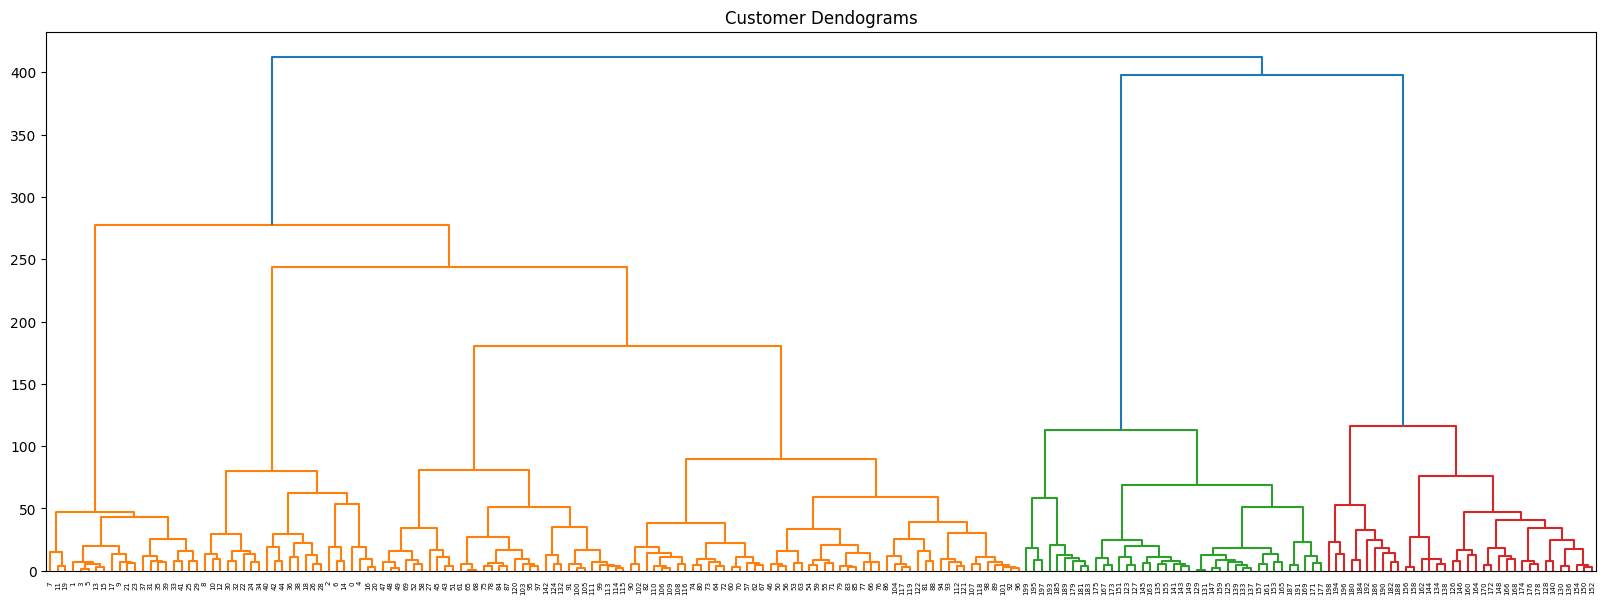

In [35]:
#code
plt.figure(figsize=(20, 7))
plt.title("Customer Dendograms")
dend = shc.dendrogram(shc.linkage(data, method='ward'))

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

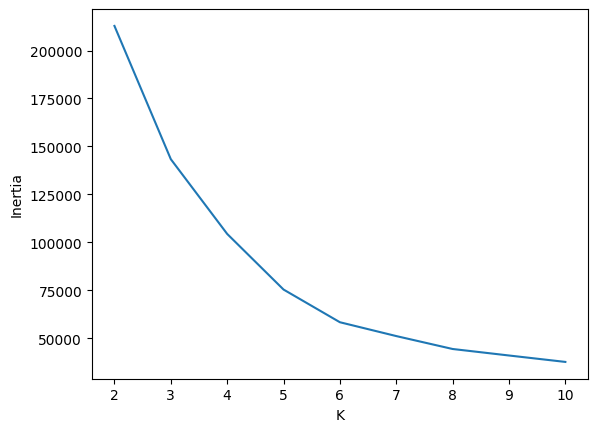

In [36]:
#code
k_range = range(2,11)
sse=[]
for k in k_range:
  kmeans = KMeans(n_clusters=k, random_state = 0)
  kmeans.fit(data)
  sse.append(kmeans.inertia_)
plt.plot(k_range, sse)
plt.xlabel('K')
plt.ylabel('Inertia')
plt.show()

*   3.2. From the obtained dengrograms, choose an appropriate number of clusters and apply **AgglomerativeClustering** algorithm to the given dataset

In [39]:
cluster = AgglomerativeClustering(n_clusters=3)
cluster.fit_predict(data)
cluster.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 1, 2, 1, 2, 1, 2,
       0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 0, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2, 1, 2,
       1, 2])

#Finally,
Save a copy in your Github. Remember renaming the notebook.